In [2]:
import os

In [3]:
model_checkpoint_path = os.getcwd()

In [4]:
model_checkpoint_path

'd:\\Whatever in stock\\test\\BRAIN SCAN IMAGES\\TARP\\MODEL FILES'

In [ ]:
import requests

url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
response = requests.get(url)

file_path = os.path.join(model_checkpoint_path, "sam_vit_h_4b8939.pth")
with open(file_path, "wb") as f:
    f.write(response.content)

In [15]:
os.path.join(model_checkpoint_path, "sam_vit_h_4b8939.pth")

'c:\\Users\\LENOVO\\Documents\\Important_documents\\VIT\\Semesters\\sem7\\TARP\\MODEL FILES\\MODEL FILES\\sam_vit_h_4b8939.pth'

In [1]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [2]:
CHECKPOINT_PATH = r"D:\Whatever in stock\test\BRAIN SCAN IMAGES\TARP\MODEL FILES\sam_vit_h_4b8939.pth"

In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [7]:
mask_generator = SamAutomaticMaskGenerator(model = sam , 
                                           pred_iou_thresh=0.9,
                                           min_mask_region_area=1000)
IMAGE_PATH = r"D:\Whatever in stock\test\BRAIN SCAN IMAGES\TARP\datasets\small_kaggle\yes\Y44.jpg"

In [8]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

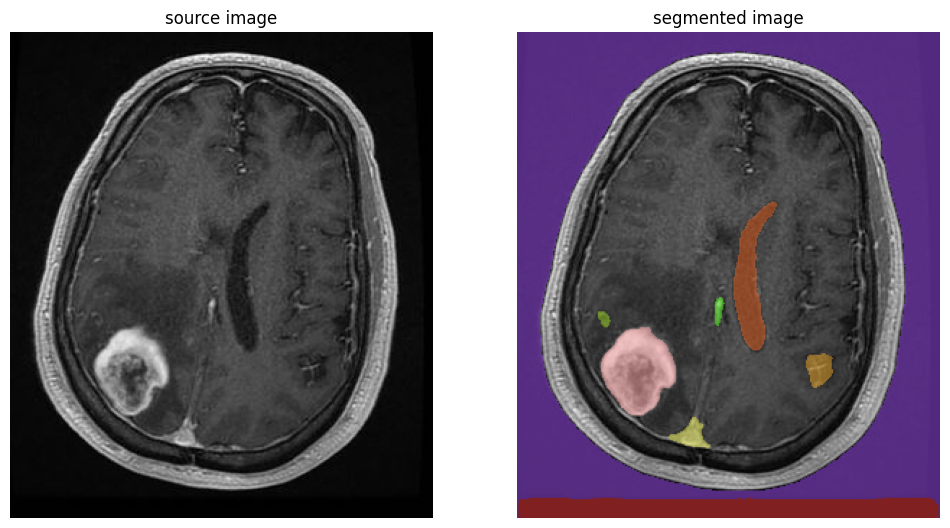

In [9]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [10]:
save_path = r"D:\Whatever in stock\test\BRAIN SCAN IMAGES\TARP\datasets\Auto_Labelled\annotated_image.jpg"
cv2.imwrite(save_path, annotated_image)

True

In [11]:
masks = [
    mask['segmentation']
    for mask
    in sorted(sam_result, key=lambda x: x['area'], reverse=True)
]
len(masks)

# cv2.imshow(masks[0] , "huh")

# sv.plot_images_grid(
#     images=masks,
#     grid_size=(8, int(len(masks) / 8)),
#     size=(16, 16)
# )

8

In [13]:
import numpy as np
import os
output_dir = r"D:\Whatever in stock\test\BRAIN SCAN IMAGES\TARP\datasets\Auto_Labelled"

for i, mask in enumerate(masks):
    # Convert mask to an 8-bit image (0 and 255)
    mask_image = (mask * 255).astype(np.uint8)
    
    # Define the path for each mask image
    mask_path = os.path.join(output_dir, f"mask_{i + 1}.png")
    
    # Save the mask image
    cv2.imwrite(mask_path, mask_image)

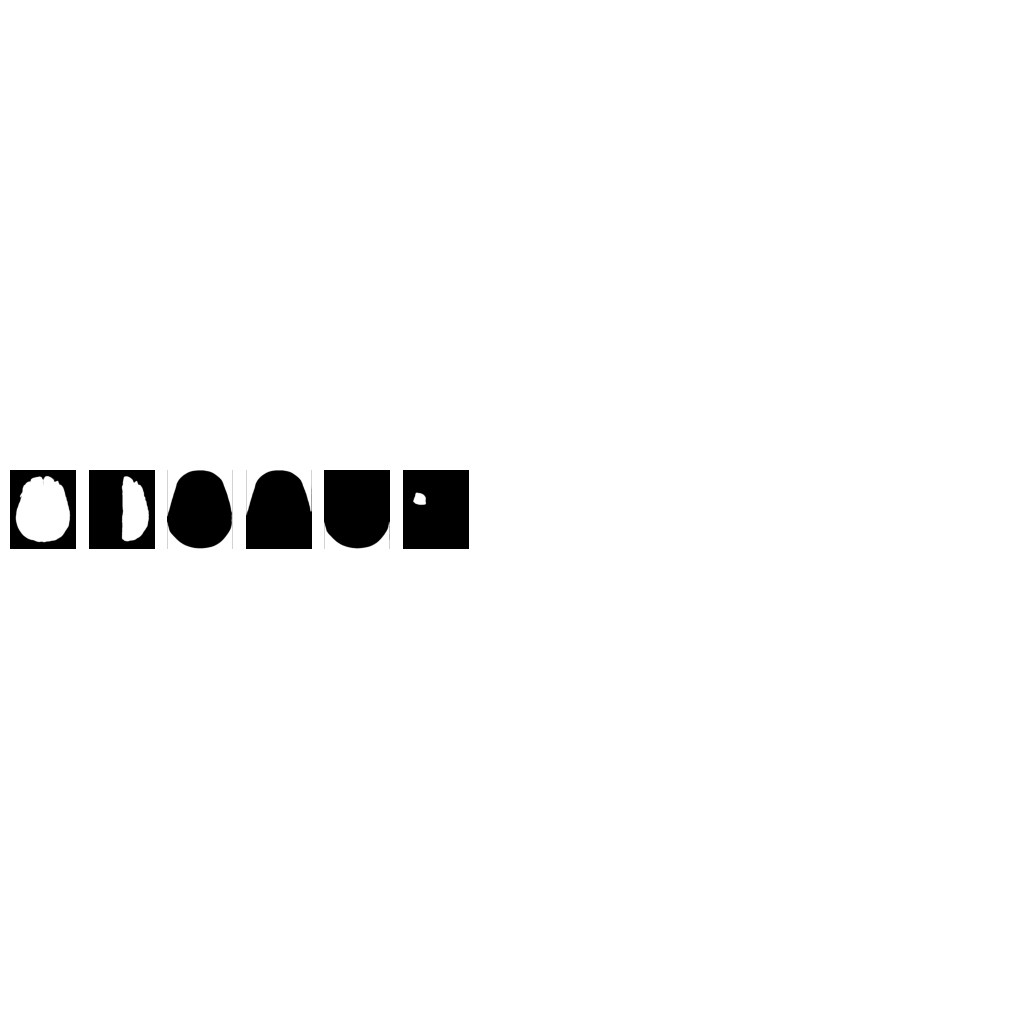

In [14]:
sv.plot_images_grid(
    images=masks,
    grid_size=(1, 13),
    size=(13,13)
)